# 1.分布分析

* 定量数据分布分析
    * 1）求极差
    * 2）决定组距与组数
    * 3）决定分点
    * 4）列出频率分布表
    * 5）绘制频率分布直方图

* 定性数据分布分析
    * 常根据变量的分类类型来分组
    * 饼图&条形图

# 2.对比分析

* 1）绝对数比较
* 2）相对数比较：
    * 1）结构相对数：产品合格率
    * 2）比例相对数：同一总体不同部分的比例 e.g：人口性别比例
    * 3）比较相对数：同一时期两个性质相同的指标数值对比 e.g 不同地区商品价格对比
    * 4）强度相对数：两个性质不同但有一定联系的总量指标进行对比 e.g 人均国内生产总值用"元/人"表示
    * 5）计划完成相对数：某一时期实际完成数与计划书的对比
    * 6）动态相对数：将同一现象在不同时期的指标数值进行对比，用以说明发展方向和变化的速度 e.g发展速度、增长速度

# 3.统计量分析
## 集中趋势度量
* 1）均值
* 2）中位数
* 3）众数
## 离散趋势度量
* 1）极差
* 2）标准差
* 3）变异系数--度量标准差相对于均值的离散趋势
* 4）四分位数间距
    * describe()给出一些基本统计量-->衍生出所需统计量

* **餐饮销量数据统计量分析**

In [6]:
from __future__ import print_function
import pandas as pd

catering_sale = 'D:\\python\\data analyse\\analyse and mining\\chapter3\\demo\\data\\catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列
print(data[:5])


data = data[(data[u'销量'] > 400)&(data[u'销量'] < 5000)] #过滤异常数据
statistics = data.describe() #保存基本统计量
print(statistics)

#衍生出所需统计量
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距

print(statistics)



                销量
日期                
2015-03-01    51.0
2015-02-28  2618.2
2015-02-27  2608.4
2015-02-26  2651.9
2015-02-25  3442.1
                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


# 5.周期性分析

> 探索某个变量是否随着时间变化而呈现出某种周期变化趋势

# 6.贡献度分析(帕累托分析、20/80定律)

* **菜品盈利数据 帕累托图**

In [10]:

from __future__ import print_function
import pandas as pd

#初始化参数
dish_profit = 'D:\\python\\data analyse\\analyse and mining\\chapter3\\demo\\data\\catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
print(data[:5])

data = data[u'盈利'].copy()
#data.sort(ascending = False)
print(data[:5])


      菜品ID    盈利
菜品名             
A1   17148  9173
A2   17154  5729
A3     109  4811
A4     117  3594
A5   17151  3195
菜品名
A1    9173
A2    5729
A3    4811
A4    3594
A5    3195
Name: 盈利, dtype: int64


<Figure size 640x480 with 2 Axes>

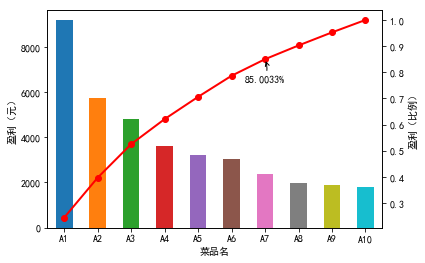

In [11]:
import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()

# 6.相关性分析

* 1）直接绘制散点图
* 2）绘制散点图矩阵：考虑多个变量间的相关关系
* 3）计算相关系数
    * 1）pearson相关系数：要求连变量的取值服从正态分布
    * 2）spearman秩相关系数：不服从正态分布的变量、分类或等及变量之间的关联性可采用spearman秩相关系数（也称等级相关系数）
    * 3）判定系数：r²，衡量回归方程对Y的解释程度

In [17]:
import pandas as pd

catering_sale = 'D:\\python\\data analyse\\analyse and mining\\chapter3\\demo\\data\\catering_sale_all.xls' #餐饮数据，含有其他属性
data = pd.read_excel(catering_sale,index_col = u'日期')
print(data[:5])

data.corr() #相关系数矩阵，即给出了任意两款菜式之间的相关系数


            百合酱蒸凤爪  翡翠蒸香茜饺  金银蒜汁蒸排骨  乐膳真味鸡  蜜汁焗餐包  生炒菜心  铁板酸菜豆腐  香煎韭菜饺  香煎罗卜糕  \
日期                                                                              
2015-01-01      17       6        8     24   13.0    13      18     10     10   
2015-01-02      11      15       14     13    9.0    10      19     13     14   
2015-01-03      10       8       12     13    8.0     3       7     11     10   
2015-01-04       9       6        6      3   10.0     9       9     13     14   
2015-01-05       4      10       13      8   12.0    10      17     11     13   

            原汁原味菜心  
日期                  
2015-01-01      27  
2015-01-02      13  
2015-01-03       9  
2015-01-04      13  
2015-01-05      14  


,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [18]:
data.corr()[u'百合酱蒸凤爪'] #只显示“百合酱蒸凤爪”与其他菜式的相关系数

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [20]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺'])  #计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数

0.009205803051836475